In [39]:
# Import libraries
import numpy as np  # Library for scientific computing
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for creating statistically-informed visualizations
from sklearn import svm  # Library for support vector machines

In [40]:
# Load dataset
df=pd.read_excel("/content/loan.xlsx")

In [41]:
# Print the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
#missing values
missing_values = df.isnull().sum()
print(missing_values)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<Axes: >

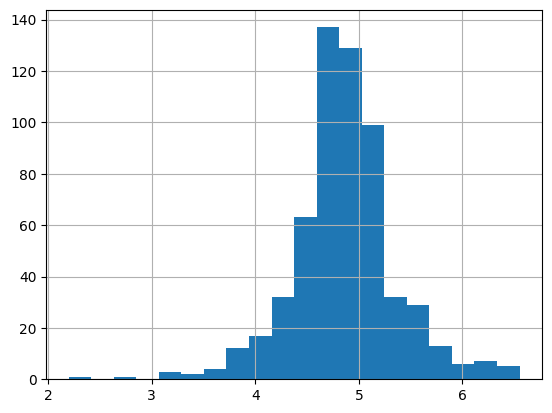

In [44]:
# prompt: df['loanAmount_log']=np.log(df['LoanAmount'])
# df['loanAmount_log'].hist(bins=20) add comments

import numpy as np
# Create a new column 'loanAmount_log' by taking the logarithm of 'LoanAmount'
df['loanAmount_log'] = np.log(df['LoanAmount'])

# Plot the histogram of 'loanAmount_log' with 20 bins
df['loanAmount_log'].hist(bins=20)

# Add comments to explain the code
# This line creates a new column 'loanAmount_log' by taking the logarithm of 'LoanAmount'
# This helps normalize the distribution of the 'LoanAmount' data
# The next line plots the histogram of the 'loanAmount_log' data
# This helps visualize the distribution of the 'LoanAmount' data after taking the logarithm


<Axes: >

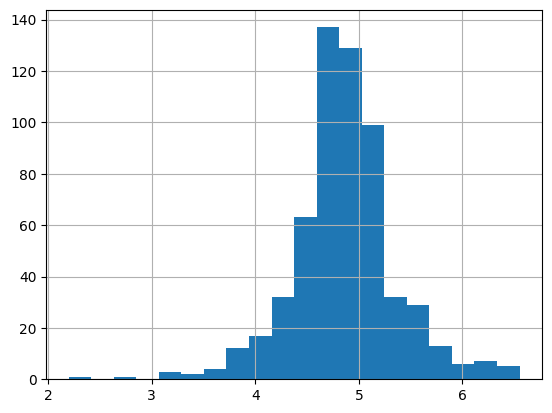

In [45]:
# Create a new column 'loanAmount_log' by taking the logarithm of 'LoanAmount'
# This line creates a new column 'loanAmount_log' by taking the logarithm of 'LoanAmount'
# This helps normalize the distribution of the 'LoanAmount' data
df['loanAmount_log']=np.log(df['LoanAmount'])

# Plots the histogram of the 'loanAmount_log' data
# This helps visualize the distribution of the 'LoanAmount' data after taking the logarithm
df['loanAmount_log'].hist(bins=20)



In [46]:
# Print the number of missing values in each column
# This helps identify columns with missing data, which can be important for data cleaning and preprocessing
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

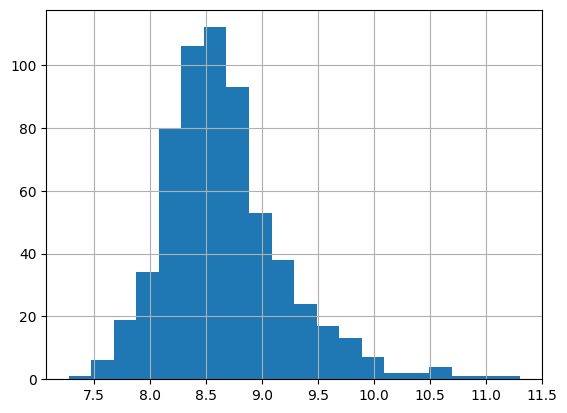

In [47]:
# Create a new column 'TotalIncome' by adding 'ApplicantIncome' and 'CoapplicantIncome'
# This new column represents the total income of the loan applicant
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

# Create a new column 'TotalIncome_log' by taking the logarithm of 'TotalIncome'
# This helps normalize the distribution of the 'TotalIncome' data
df['TotalIncome_log']=np.log(df['TotalIncome'])

# Plot the histogram of the 'TotalIncome_log' data with 20 bins
# This helps visualize the distribution of the 'TotalIncome' data after taking the logarithm
df['TotalIncome_log'].hist(bins=20)

In [48]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df.LoanAmount =  df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [49]:
x= df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [50]:
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [51]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [52]:
print("percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

percentage of missing gender is 0.000000%


Number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


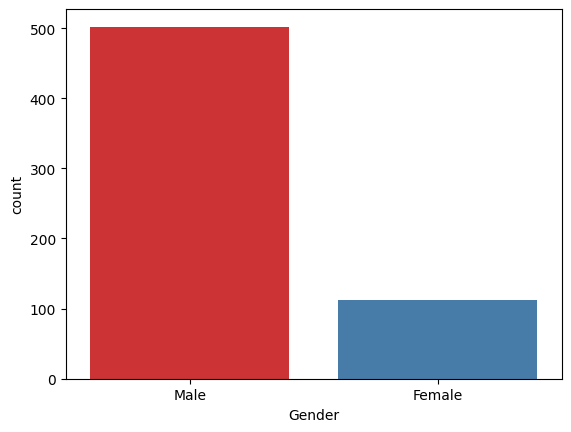

In [53]:
print("Number of people who take loan as group by gender:")

print(df['Gender'].value_counts())

# Create a bar chart of the number of people who take loan as group by gender.
sns.countplot(x='Gender', data=df, hue='Gender', palette='Set1')

# Display the bar chart.
plt.show()


Number of people who take loan as group by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

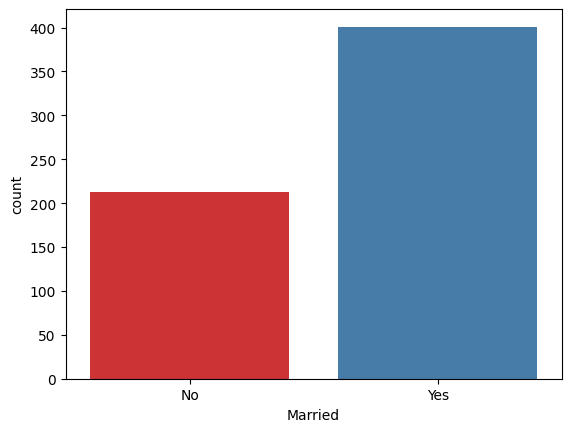

In [54]:
print("Number of people who take loan as group by marital status:")

print(df['Married'].value_counts())

# Create a bar chart of the number of people who take loan as group by married.
sns.countplot(x='Married', data=df, hue='Married', palette='Set1')



Number of people who take loan as group by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

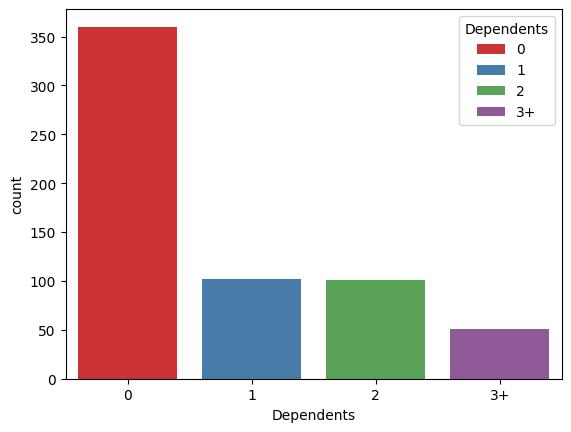

In [55]:
print("Number of people who take loan as group by dependents:")

print(df['Dependents'].value_counts())

# Create a bar chart of the number of people who take loan as group by dependents.
sns.countplot(x='Dependents', data=df, hue='Dependents', palette='Set1')



Number of people who take loan as group by self employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-56-ae463c2c44d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df,  palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

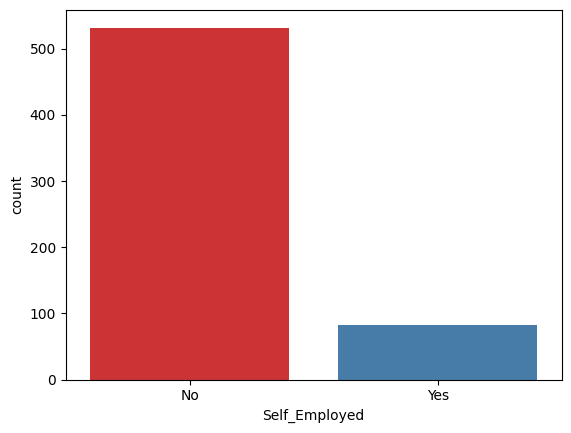

In [56]:
print("Number of people who take loan as group by self employed:")

print(df['Self_Employed'].value_counts())

# Create a bar chart of the number of people who take loan as group by self employed.
sns.countplot(x='Self_Employed', data=df,  palette='Set1')



Number of people who take loan as group by Loan Amount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-57-c7aa1cc0e29e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

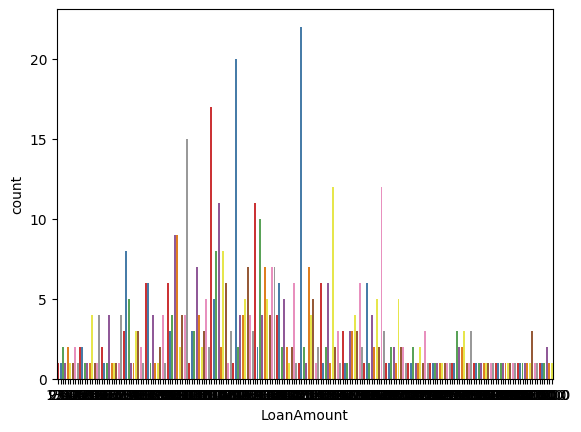

In [57]:
print("Number of people who take loan as group by Loan Amount:")

print(df['LoanAmount'].value_counts())

# Create a bar chart of the number of people who take loan as group by loan amount.
sns.countplot(x='LoanAmount', data=df, palette='Set1')



Number of people who take loan as group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-58-2bf71ef15d58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

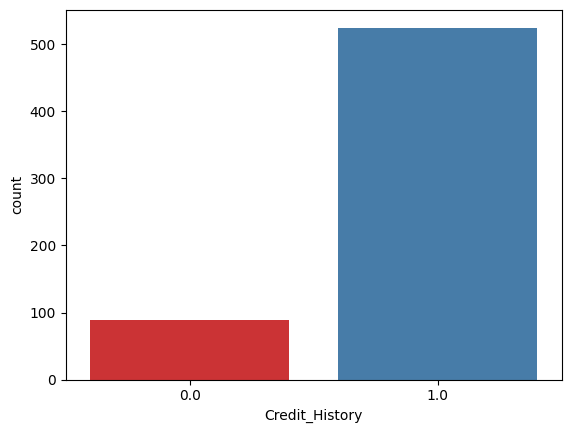

In [58]:
print("Number of people who take loan as group by Credit History:")

print(df['Credit_History'].value_counts())

# Create a bar chart of the number of people who take loan as group by credit history.
sns.countplot(x='Credit_History', data=df, palette='Set1')



In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [60]:
for i in range(0, 5):
  X_train[:,i]= Labelencoder_x.fit_transform(X_train[:,i].astype(str))
  X_train[:,7]= Labelencoder_x.fit_transform(X_train[:,7].astype(str))

X_train


array([[1, 1, 0, ..., 1.0, 4.875197323201151, 450],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 306],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 422],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 143],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 456],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 44]], dtype=object)

In [61]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [62]:
for i in range (0,5):
  X_test[:,i]= Labelencoder_x.fit_transform(X_test[:,i].astype(str))
  X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7].astype(str))

X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 117],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 3],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 1],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 52],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 113],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 26],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 49],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 56],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 28],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 30],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 85],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 81],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 62],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 63],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 74],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 113],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 8],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 116],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 80],
       [1, 

In [63]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
from sklearn import metrics
y_pred_model1 = rf_clf.predict(X_test)

print("Accuracy of Random Forest Classifier is", metrics.accuracy_score(y_pred_model1, y_test)*100)
y_pred_model1

Accuracy of Random Forest Classifier is 77.23577235772358


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [67]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred_model2 = nb_clf.predict(X_test)

print("Accuracy of Naive Bayes Classifier is", metrics.accuracy_score(y_pred_model2, y_test)*100)
y_pred_model2

Accuracy of Naive Bayes Classifier is 82.92682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred_model3 = dt_clf.predict(X_test)

print("Accuracy of Decision Tree Classifier is", metrics.accuracy_score(y_pred_model3, y_test)*100)
y_pred_model3

Accuracy of Decision Tree Classifier is 70.73170731707317


array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [71]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred_model4 = kn_clf.predict(X_test)

print("Accuracy of Decision Tree Classifier is", metrics.accuracy_score(y_pred_model4, y_test)*100)
y_pred_model4

Accuracy of Decision Tree Classifier is 77.23577235772358


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

Therefore, Naive Bayes Classifier gives the best accuracy among the other Classifer models.


In [73]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(rf_clf,y_test,y_pred_model1)
generate_classification_report(nb_clf,y_test,y_pred_model2)
generate_classification_report(dt_clf,y_test,y_pred_model3)
generate_classification_report(kn_clf,y_test,y_pred_model4)

Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.81      0.90      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.76      0.77      0.76       123


Classification Report For GaussianNB():
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        33
           1       0.81      0.79      0.80        90

    accuracy                        